# Exercício 3

Temos um pedaço de papelão que é de 14 cm por 10 cm, e queremos cortar os cantos, como mostrado abaixo, e dobrar os lados para formar uma caixa, também mostrado abaixo.
Determinar a altura da caixa que resulta um volume máximo.

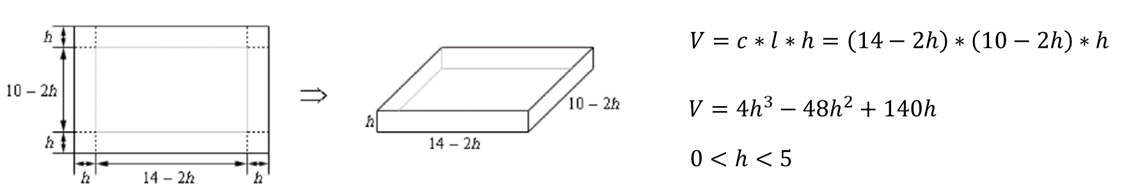

## Instalar pacote DEAP

In [18]:
!pip install deap

# Importar bibliotecas necessárias

In [19]:
import matplotlib.pyplot as plt
from deap import base, creator, tools
import operator
import random
import numpy
import math

## Partícula

part = [h]

   - **h**: Altura

   
   
**Observação:** comprimento = $14-2h$

**Observação:** largura: $10-2h$


# Função objetivo

   - Função objetivo com objetivo de maximizar o volume

In [20]:
def objective_function(individual):
    volume = (4*individual[0]**3)-(48*individual[0]**2)+140*individual[0]
    return volume,

# Restrição do problema


- Verificar partícula - restrições impostas as partículas
  - Há uma restrição no tamanho do papel de 14cm x 10cm.
  - Ja foi incluido na função objetivo.

In [21]:
#def feasible(individual):
#        if individual[0] > 10:
#          return False
#        return True
#
# Não tenho restrições pois ja foi incluido na função objetivo.

## Criando a função de Minimização e a estrutura da partícula

In [22]:
#  função objetivo: nome, tipo(f.o.), o peso deve ser 1.0 para esse caso (função de maximização)
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMin, speed=list, smin=None, smax=None, best=None)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Particle' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


## Definindo uma função para gerar a partícula

In [23]:
# Função que cria uma partícula inicializando os atributos aleatoriamente.
# size é o número de variáveis de decisão, pmin e pmax são os limites das variáveis, smin e smax são os limites de velocidade
def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

## Definindo a função para atualização da partícula 

In [24]:
# Esta função calcula a velocidade, os limites de veloicidade e a nova posição da partícula
# phi1 = fator cognitivo e phi2 = fator social
def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part)) # indo em direção ao melhor conhecido pela partícula
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part)) # indo em direção ao melhor da vizinhaça
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

## Criando o toolbox

In [25]:
toolbox = base.Toolbox()

# Função para gerar a partícula com valores 
toolbox.register("particle", generate, size=1, pmin=0, pmax=5, smin=-2, smax=2)

# Adicionando a função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.particle)

# Adicionando a função para atualizar a população
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)

# Adicionando as funções para avaliar a população
toolbox.register("evaluate", objective_function)
#toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, -100000000))

## Definindo parêmetros para o PSO

   - **initial_population:** Número de inidivíduos da população inicial
   - **num_gen:** Número de iterações
   - **best:** Melhor partícula

In [26]:
initial_population = 100    
num_ite = 1000
best = None

### Criando a população inicial

In [27]:
# inicializando a população
pop = toolbox.population(n=initial_population)

### Estatísticas de avaliação (a cada geração)

   - Função objetivo
   - Média
   - Desvio padrão
   - Mínimo
   - Máximo

In [28]:
# estatísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

### Definindo um log para avaliar as partículas ao longo das iterações

In [29]:
logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

## Otimização

In [30]:
# Roda a otimização
for iteration in range(num_ite):
    for part in pop:
        part.fitness.values = toolbox.evaluate(part)
        # atualiza melhor da partícula
        if not part.best or part.best.fitness < part.fitness:
            part.best = creator.Particle(part)
            part.best.fitness.values = part.fitness.values
        # atualiza melhor global
        if not best or best.fitness < part.fitness:
            best = creator.Particle(part)
            best.fitness.values = part.fitness.values
    for part in pop:
        toolbox.update(part, best)

    # Salva todos os fitnesses em uma lista e imprime o status
    logbook.record(gen=iteration, evals=len(pop), **stats.compile(pop))
    print(logbook.stream)

gen	evals	avg    	std    	min    	max    
0  	100  	73.8918	38.3438	1.41154	120.157
1  	100  	91.639 	35.0357	-36.2576	120.154
2  	100  	79.3737	44.6759	-67.2133	120.125
3  	100  	83.3749	45.1271	-110.318	120.158
4  	100  	76.2372	69.3781	-410.935	120.163
5  	100  	81.3396	78.8257	-572.625	120.163
6  	100  	73.8317	49.8101	-83.6015	120.163
7  	100  	83.1994	57.3584	-250.105	120.164
8  	100  	64.1717	75.5621	-251.123	120.161
9  	100  	81.3919	63.1693	-263    	120.164
10 	100  	81.4349	42.5208	-16.9363	120.161
11 	100  	91.0631	37.1738	-67.7343	120.162
12 	100  	82.9023	42.7016	-199.447	120.163
13 	100  	88.1839	43.7193	-160.86 	120.163
14 	100  	89.3205	35.7804	-12.3356	120.164
15 	100  	91.4839	33.2313	-20.2343	120.153
16 	100  	93.9793	27.9566	-8.80803	120.164
17 	100  	84.9703	39.5081	-87.5593	120.148
18 	100  	92.054 	35.9463	-12.1351	120.162
19 	100  	83.9843	36.7967	-21.543 	120.164
20 	100  	92.7924	37.4021	-89.2891	120.164
21 	100  	90.7535	36.3554	-88.7471	120.163
22 	100  	88.

## Melhor indivíduo

In [31]:
print('Largura: ', (10-2*best[0]))
print('Comprimento: ', (14-2*best[0]))
print('Altura: ', best[0])

Largura:  6.163347223242909
Comprimento:  10.163347223242909
Altura:  1.9183263883785453


## Avaliação do melhor indivíduo

In [32]:
print('Volume: ',objective_function(best))

Volume:  (120.16442131337845,)
